## Import libraries

In [3]:
# Load libraries 
import pandas as pd
import matplotlib.pyplot as plt


## Customize

In [5]:
# Define the variables for budgeted and actual data

# Which currency are you using
mycurrency ='AED'

# name the file to save variance report
myfile= '0204 variance_report.csv'

# name the file to save the stacked bar chart
mybarchart = '0204 variance_stacked.jpg'

# name the file to save the pie chart
mypiechart = '0204 variance_pie.jpg'

# Provide the names of the materials
material_1 = 'Ice-cream'
material_2 = 'Nuts'

# Provide standard cost information
base_production_unit = 10000
base_material_1_usage = 20000
base_material_2_usage = 10000

# Provide budgeted usage and cost information about the materials
budgeted_production_unit=12000
budgeted_material_1_cost_per_unit = 6
budgeted_material_2_cost_per_unit = 3

# Provide actual usage and cost information about the materials
actual_material_1_units = 23500
actual_material_1_cost_per_unit = 6.5
actual_material_2_units = 12200
actual_material_2_cost_per_unit = 2.9

## Compute base data for variance analysis

In [7]:
# Step 1: Compute the total budgeted and actual costs

budgeted_material_1_units = base_material_1_usage * (budgeted_production_unit/base_production_unit)
budgeted_material_2_units = base_material_2_usage * (budgeted_production_unit/base_production_unit)

budgeted_material_1_total_cost = budgeted_material_1_units * budgeted_material_1_cost_per_unit
budgeted_material_2_total_cost = budgeted_material_2_units * budgeted_material_2_cost_per_unit

total_budgeted_cost = budgeted_material_1_total_cost + budgeted_material_2_total_cost
total_budgeted_units = budgeted_material_1_units + budgeted_material_2_units

actual_material_1_total_cost = actual_material_1_units * actual_material_1_cost_per_unit
actual_material_2_total_cost = actual_material_2_units * actual_material_2_cost_per_unit

actual_total_cost = actual_material_1_total_cost + actual_material_2_total_cost
actual_total_unit = actual_material_1_units + actual_material_2_units

## Compute additional data for variance analysis

In [9]:
# Compute the standard cost for actuals 
standard_cost_for_actuals_material_1 = actual_material_1_units * budgeted_material_1_cost_per_unit
standard_cost_for_actuals_material_2 = actual_material_2_units * budgeted_material_2_cost_per_unit
standard_actual_total_cost = standard_cost_for_actuals_material_1 + standard_cost_for_actuals_material_2 
standard_actual_total_unit = actual_total_unit 

# Standard mix for actuals: Distribute actual total quantity across all materials
standard_mix_for_actuals_material_1 = (budgeted_material_1_units / total_budgeted_units) * actual_total_unit
standard_mix_for_actuals_material_2 = (budgeted_material_2_units / total_budgeted_units) * actual_total_unit
standard_mix_for_actuals_total = standard_mix_for_actuals_material_1 + standard_mix_for_actuals_material_2
standard_mix_for_actuals_unit = actual_total_unit

## Compute variances at top and first layer

In [11]:
# Compute the variances
budget_variance = total_budgeted_cost - actual_total_cost 
material_price_variance = standard_actual_total_cost - actual_total_cost 
material_usage_variance = total_budgeted_cost - standard_actual_total_cost

budget_variance_material_1 = budgeted_material_1_total_cost - actual_material_1_total_cost
budget_variance_material_2 = budgeted_material_2_total_cost - actual_material_2_total_cost

material_price_variance_material_1 = standard_cost_for_actuals_material_1 - actual_material_1_total_cost
material_price_variance_material_2 = standard_cost_for_actuals_material_2 - actual_material_2_total_cost

material_usage_variance_material_1 = budgeted_material_1_total_cost - standard_cost_for_actuals_material_1
material_usage_variance_material_2 = budgeted_material_2_total_cost - standard_cost_for_actuals_material_2

## Compute variances at detailed layers

In [13]:
# Step 4: Compute material mix and yield variances
material_mix_variance_material_1 = (standard_mix_for_actuals_material_1 - actual_material_1_units) * budgeted_material_1_cost_per_unit

material_mix_variance_material_2 = (standard_mix_for_actuals_material_2 - actual_material_2_units) * budgeted_material_2_cost_per_unit

material_yield_variance_material_1 = (budgeted_material_1_units - standard_mix_for_actuals_material_1) * budgeted_material_1_cost_per_unit
material_yield_variance_material_2 = (budgeted_material_2_units - standard_mix_for_actuals_material_2) * budgeted_material_2_cost_per_unit

total_material_mix_variance = material_mix_variance_material_1 + material_mix_variance_material_2

total_material_yield_variance = material_yield_variance_material_1 + material_yield_variance_material_2


In [14]:
## Print various level of variance

In [15]:
# Print out all the variances and costs

print(f"Step 1: Budgeted and Actual Total Costs")
print(f"Budgeted {material_1} Total Cost: {mycurrency} {budgeted_material_1_total_cost}")
print(f"Budgeted {material_2} Total Cost: {mycurrency} {budgeted_material_2_total_cost}")
print(f"Actual {material_1} Total Cost: {mycurrency} {actual_material_1_total_cost}")
print(f"Actual {material_2} Total Cost: {mycurrency} {actual_material_2_total_cost}")
print(f"Total Budgeted Cost: {mycurrency} {budgeted_material_1_total_cost + budgeted_material_2_total_cost}")
print(f"Total Actual Cost: {mycurrency} {actual_material_1_total_cost + actual_material_2_total_cost}")

print(f"\nStep 2: Standard Cost for Actuals and Standard Mix for Actuals")
print(f"Standard Cost for Actuals ({material_1}): {mycurrency} {standard_cost_for_actuals_material_1}")
print(f"Standard Cost for Actuals ({material_2}): {mycurrency} {standard_cost_for_actuals_material_2}")
print(f"Standard Mix for Actuals ({material_1}): {mycurrency} {standard_mix_for_actuals_material_1}")
print(f"Standard Mix for Actuals ({material_2}): {mycurrency} {standard_mix_for_actuals_material_2}")

print(f"\nStep 3: Variance Analysis")
print(f"Budget Variance: AED {budget_variance}")
print(f"Material Price Variance: {mycurrency} {material_price_variance}")
print(f"Material Usage Variance: {mycurrency} {material_usage_variance}")

print(f"\nStep 4: Material Mix and Yield Variances")
print(f"Material Mix Variance ({material_1}): {mycurrency} {material_mix_variance_material_1}")
print(f"Material Mix Variance ({material_2}): {mycurrency} {material_mix_variance_material_2}")

print(f"Total Material Mix Variance: AED {total_material_mix_variance}")

print(f"Material Yield Variance ({material_1}): {mycurrency} {material_yield_variance_material_1}")
print(f"Material Yield Variance ({material_2}): {mycurrency} {material_yield_variance_material_2}")
print(f"Total Material Yield Variance: {mycurrency} {total_material_yield_variance}")


Step 1: Budgeted and Actual Total Costs
Budgeted Ice-cream Total Cost: AED 144000.0
Budgeted Nuts Total Cost: AED 36000.0
Actual Ice-cream Total Cost: AED 152750.0
Actual Nuts Total Cost: AED 35380.0
Total Budgeted Cost: AED 180000.0
Total Actual Cost: AED 188130.0

Step 2: Standard Cost for Actuals and Standard Mix for Actuals
Standard Cost for Actuals (Ice-cream): AED 141000
Standard Cost for Actuals (Nuts): AED 36600
Standard Mix for Actuals (Ice-cream): AED 23800.0
Standard Mix for Actuals (Nuts): AED 11900.0

Step 3: Variance Analysis
Budget Variance: AED -8130.0
Material Price Variance: AED -10530.0
Material Usage Variance: AED 2400.0

Step 4: Material Mix and Yield Variances
Material Mix Variance (Ice-cream): AED 1800.0
Material Mix Variance (Nuts): AED -900.0
Total Material Mix Variance: AED 900.0
Material Yield Variance (Ice-cream): AED 1200.0
Material Yield Variance (Nuts): AED 300.0
Total Material Yield Variance: AED 1500.0


## Saving the variance values in a csv file  

In [17]:
# Create a dictionary to store the values
variance_data = {
    "Particulars": ["Budget variance", "Price Variance", "Usage variance", "Mix Variance", "Yield variance"],
    material_1: [budget_variance_material_1, material_price_variance_material_1, material_usage_variance_material_1, material_mix_variance_material_1,material_yield_variance_material_1],
    material_2 : [budget_variance_material_2,material_price_variance_material_2, material_usage_variance_material_2, material_mix_variance_material_2,material_yield_variance_material_2], 
    "Total" : [budget_variance, material_price_variance, material_usage_variance,total_material_mix_variance, total_material_yield_variance ],
}

# Create a DataFrame
df = pd.DataFrame(variance_data)

# Save the DataFrame to a CSV file
df.to_csv(myfile, index=False)

# Display the dataframe
print(df)


       Particulars  Ice-cream    Nuts    Total
0  Budget variance    -8750.0   620.0  -8130.0
1   Price Variance   -11750.0  1220.0 -10530.0
2   Usage variance     3000.0  -600.0   2400.0
3     Mix Variance     1800.0  -900.0    900.0
4   Yield variance     1200.0   300.0   1500.0


## Visualize variance - Stacked bar

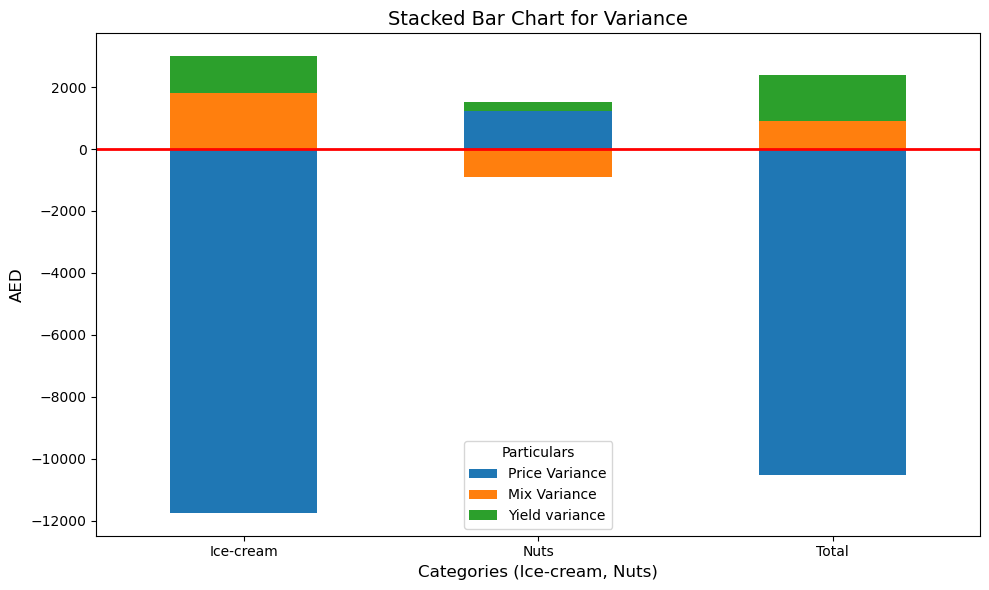

In [19]:
# Load the data
file_path = myfile
data = pd.read_csv(file_path)

# Set the index to 'Particulars' for better visualization
data.set_index('Particulars', inplace=True)

# Select only the rows for Price Variance, Mix Variance, and Yield Variance
variance_types = ['Price Variance', 'Mix Variance', 'Yield variance']

# Filter the data to include only the selected variance types for Ice-cream and Nuts
data_filtered = data.loc[variance_types, [material_1, material_2, 'Total']]

# Restructure the data for Ice-cream and Nuts as the categories on x-axis and variance types as the stacked components
data_transposed = data_filtered.transpose()

# Plotting the stacked bar chart with Ice-cream and Nuts on x-axis
ax = data_transposed.plot(kind='bar', stacked=True, figsize=(10, 6))

#Adding a red line at y=0
plt.axhline(0, color='red', linewidth=2)

# Adding titles and labels
plt.title('Stacked Bar Chart for Variance', fontsize=14)
plt.xlabel(f'Categories ({material_1}, {material_2})', fontsize=12)
plt.ylabel(mycurrency, fontsize=12)

#Formatting the plot
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot to a JPG file
plt.savefig(mybarchart, format='jpg')

# Display the plot
plt.show()


## Visualize variance - Pie chart

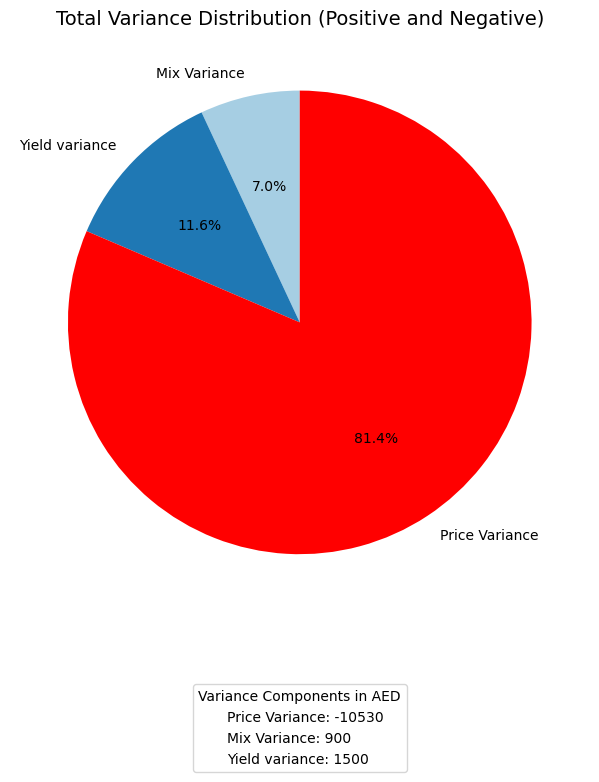

In [21]:
# Select only the rows for Price Variance, Mix Variance, and Yield Variance
variance_types = ['Price Variance', 'Mix Variance', 'Yield variance']

# Filter the data to include only the selected variance types for Ice-cream and Nuts
data_filtered = data.loc[variance_types, [material_1, material_2]]

# Restructure the data for Ice-cream and Nuts as the categories on x-axis and variance types as the stacked components
data_transposed = data_filtered.transpose()

# Calculate the total values
totals = data_transposed.sum(axis=0)

# Split the totals into positive and negative components
positive_totals = totals[totals >= 0]
negative_totals = totals[totals < 0]

# Combine the positive and negative totals for display, making negative values positive for the pie chart
combined_totals = pd.concat([positive_totals, -negative_totals])

# Create a color map: positive values with a palette of colors, negative in red
positive_colors = plt.cm.Paired.colors[:len(positive_totals)]  # Use a color palette for positive values
colors = list(positive_colors) + ['red'] * len(negative_totals)  # Red for negative values

# Create labels for the legend, showing original values (including negatives) rounded to integers
legend_labels = [f'{index}: {int(value)}' for index, value in totals.items()]

# Plotting the pie chart with the combined totals (absolute values for display)
plt.figure(figsize=(8, 8))
plt.pie(combined_totals, labels=combined_totals.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Adding the legend without any colors by creating empty handles
plt.legend(legend_labels, title=f"Variance Components in {mycurrency}", loc="center", bbox_to_anchor=(0.5, -0.2), fontsize=10, handlelength=0)

# Adding a title
plt.title('Total Variance Distribution (Positive and Negative)', fontsize=14)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot to a JPG file
plt.savefig(mypiechart, format='jpg')

# Display the plot
plt.show()
